In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense

In [28]:
#%% Prepare the data
X = np.array([i for i in range(16)]).reshape(-1, 1)
noise_std_dev = 0.5 # Standard deviation of the noise
# Generate random noise
np.random.seed(40)
noise = np.random.normal(loc=0,scale=noise_std_dev, size=X.shape)
y = X + noise # Create y array by adding noise to X
# Add a column of ones to X to account for the bias term (theta_0)
X_b = np.c_[np.ones((len(X), 1)), X]
print(X_b.shape[1])

2


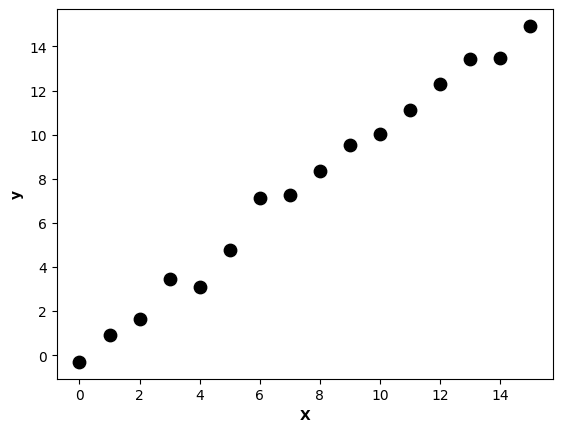

In [29]:
#plotting data
plt.scatter(X,y, color='black',s=80)
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()

In [30]:
#%% Define the model
model = Sequential()
model.add(keras.Input(shape=(X_b.shape[1],)))
# First layer with 10 neurons and ReLU activation
model.add(Dense(10, activation='relu'))
# Second layer with 10 neurons and ReLU activation
model.add(Dense(10, activation='relu'))
# Output layer with 1 neuron for regression output
model.add(Dense(1))

In [31]:
from keras.api.callbacks import EarlyStopping

In [32]:
early_stopping = EarlyStopping(
    monitor="loss",
    min_delta=0.0001,
    patience=10,
    restore_best_weights=True)

In [33]:
#%% Compile the model
# Stochastic Gradient Descent (SGD)
# model.compile(optimizer='adam',loss='mean_squared_error')
# Adaptive Moment Estimation (Adam)
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
#%% Train the model
history = model.fit(X_b, y, epochs=20000 ,callbacks=[early_stopping])

Epoch 1/20000


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 73.5512
Epoch 2/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 71.6255
Epoch 3/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 69.6756
Epoch 4/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 67.7408
Epoch 5/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 65.8253
Epoch 6/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 63.9307
Epoch 7/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 62.0579
Epoch 8/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 60.2077
Epoch 9/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 58.3807
Epoch 10/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 56.5776
Epoch 11/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 54.7990
Epoch 12/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 53.0456
Epoch 13/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 51.3179
Epoch 14/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 49.6166
Epoch 15/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss

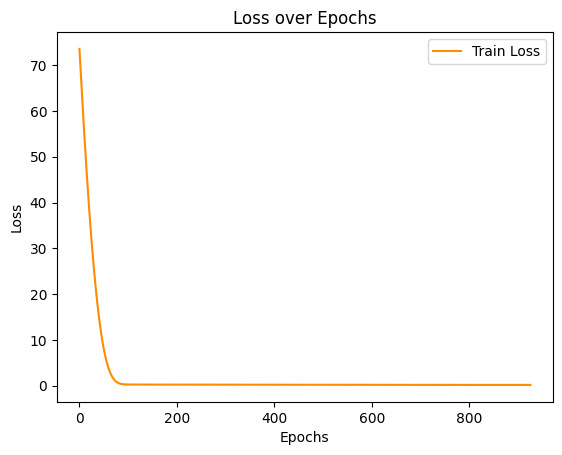

In [35]:
#%% Plotting the cost over epochs
loss_history = history.history['loss']
plt.plot(loss_history, label='Train Loss', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [36]:
loss= model.evaluate(X_b,y)
print(f"Training loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.1759
Training loss: 0.17589159309864044


In [37]:
y_pred=model.predict(X_b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


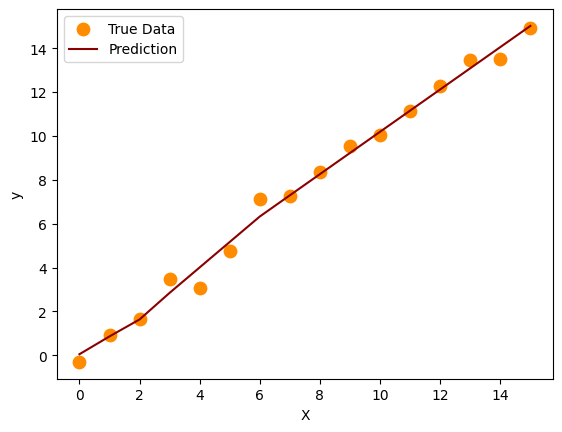

In [38]:
plt.scatter(X,y, label= 'True Data', color='darkorange', s=80)
plt.plot(X,y_pred, label='Prediction', color='darkred')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [39]:
new_X=np.array([[19],[22]])
new_X_b=np.c_[np.ones((len(new_X),1)),new_X]
print(model.predict(new_X_b))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[18.880596]
 [21.777039]]
